<a href="https://colab.research.google.com/github/ikonushok/My_studying_Data-Science-and-Neyro-Nets-on-Python/blob/master/%D0%94%D0%97_3_Pro_cifar10_0_92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRO

## Вариант 2
----
Добейтесь точности 90% на проверочной выборке на базе Cifar10. 
Размер проверочной выборки 20%. 

In [ ]:
# Импорт библиотек
from tensorflow.keras.datasets import cifar10

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, Adamax, Adadelta, Adagrad
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, CSVLogger

import numpy as np
import random

# для контроля времени выполнения обучения
from datetime import datetime

# выводим для примера картинку для каждого класса
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

###Загрузка и обработка изображений

170500096/170498071 [==============================] - 3s 0us/step


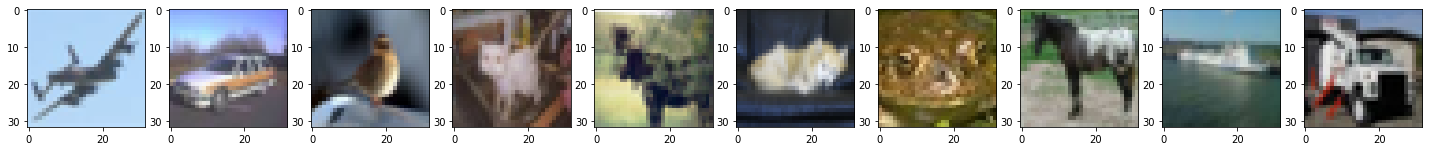

In [ ]:
# Загрузка cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
# задаем названия классам по-порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовки']

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #создаем полотно из 10 графиков
for i in range(10):
  label_indexes = np.where(y_train10==i)[0] #получили список индексов положений класса i  в  y_train10
  index = random.choice(label_indexes) #выбираем из этого списка случайный индекс
  img = x_train10[index] #берем нужное изображение из x_train10
  axs[i].imshow(Image.fromarray(img)) #отображаем изображение на i-м графике

plt.show() # показываем изображения


In [ ]:
# переводим y_train и y_test в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [ ]:
#нормализуем изображения
x_train10 = x_train10.astype('float32')
x_test10 = x_test10.astype('float32')
x_train10 /= 255
x_test10 /= 255

In [ ]:
# проверяем размеры выборок
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


###Создание нейросети

In [ ]:
N_lr = 0.0001 # проверить при стандартных 0,0001
batch_size = int(128/4) #было128/2
kernel_size = 3
pool_size = 2
conv_depth = 128 # после увеличение не дает эффект
dense_size = 512*2
k_Dropout = 0.25 # проверить при 0,5 в слое Dense
num_classes = 10

In [ ]:
model = Sequential()
  
model.add(BatchNormalization(input_shape=(32, 32, 3))) #Слой пакетной нормализации
model.add(Conv2D(conv_depth, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(pool_size, pool_size))) #слой подвыборки
model.add(Dropout(k_Dropout)) #Слой регуляризации Dropout

model.add(BatchNormalization()) #Слой пакетной нормализации
model.add(Conv2D(conv_depth*2, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth*2, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth*2, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(pool_size, pool_size))) #слой подвыборки
model.add(Dropout(k_Dropout)) #Слой регуляризации Dropout

model.add(BatchNormalization()) #Слой пакетной нормализации
model.add(Conv2D(conv_depth*4, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth*4, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth*4, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(pool_size, pool_size))) #слой подвыборки
model.add(Dropout(k_Dropout)) #Слой регуляризации Dropout

model.add(BatchNormalization()) #Слой пакетной нормализации
model.add(Conv2D(conv_depth*6, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth*6, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth*6, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(pool_size, pool_size))) #слой подвыборки
model.add(Dropout(k_Dropout)) #Слой регуляризации Dropout

model.add(BatchNormalization()) #Слой пакетной нормализации
model.add(Conv2D(conv_depth*8, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth*8, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(Conv2D(conv_depth*8, (kernel_size, kernel_size), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(pool_size, pool_size))) #слой подвыборки
model.add(Dropout(k_Dropout)) #Слой регуляризации Dropout

model.add(Flatten()) #Слой преобразования данных из 2D представления в плоское
model.add(Dense(dense_size, activation='relu')) #Полносвязный слой для классификации
model.add(Dropout(k_Dropout))
model.add(Dense(num_classes, activation='softmax')) #Выходной полносвязный слой


#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(N_lr), metrics=["accuracy"])


### Настройка datagen, callbacks и обучение модели

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
1562/1562 [==============================] - 80s 51ms/step - loss: 1.6836 - accuracy: 0.3651 - val_loss: 1.4475 - val_accuracy: 0.4884
Epoch 2/200
1562/1562 [==============================] - 80s 51ms/step - loss: 1.2335 - accuracy: 0.5634 - val_loss: 1.1261 - val_accuracy: 0.6005
Epoch 3/200
1562/1562 [==============================] - 79s 51ms/step - loss: 0.9960 - accuracy: 0.6539 - val_loss: 1.0008 - val_accuracy: 0.6659
Epoch 4/200
1562/1562 [==============================] - 79s 51ms/step - loss: 0.8577 - accuracy: 0.7063 - val_loss: 0.8457 - val_accuracy: 0.7096
Epoch 5/200
1562/1562 [==============================] - 79s 51ms/step - loss: 0.7601 - accuracy: 0.7451 - val_loss: 0.7070 - val_accuracy: 0.7573
Epoch 6/200
1562/1562 [==============================] - 79s 51ms/step - loss: 0.6844 - accuracy: 0.7709 - val_loss: 0.6799 - val_accuracy: 0.7763
Epoch 7/200
1562/1562 [===================

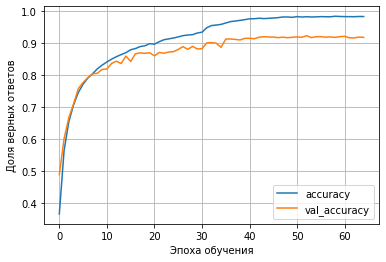

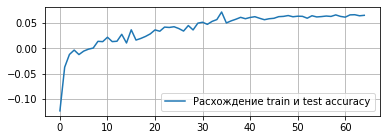

In [ ]:
# измерение времени обучения
start_time = datetime.now()

# задание условий 
# остановки обучения
early_stopping = EarlyStopping(monitor = 'val_accuracy', 
                               patience = 12, verbose = 1,
                               restore_best_weights = True)
# замедление скорости
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor=0.5, 
                              verbose = 1,
                              patience = 2, min_lr = 0.0000001)
# запись лога обучения в csv файл
#csv_logger = CSVLogger('/content/drive/My Drive/Colab Notebooks/Adam_training_2.log') 

#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255,       #Значения цвета меняем на дробные показания
    rotation_range=10,      #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1,  #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1,         #Зумируем изображения при генерации выборки
    horizontal_flip=True,   #Отключаем отзеркаливание изображений
    fill_mode='wrap',       #Заполнение пикселей вне границ ввода
)

# Используем fit_generator
history = model.fit_generator(datagen.flow(x_train10, y_train10,
                                           batch_size = batch_size),
                              steps_per_epoch = int(len(x_train10) / batch_size), 
                              epochs=200,
                              verbose=1,
                              validation_data=datagen.flow(x_test10, y_test10, 
                                                           batch_size = batch_size),
                              callbacks = ([reduce_lr],
                                           [early_stopping]
                                           ))

#сохранение модели
#model.save('/content/drive/My Drive/Colab Notebooks/Adam_cifar10_2.h5')
#model.save_weights('/content/drive/My Drive/Colab Notebooks/Adam_cifar10_2.hdf5')


print('Время обучения: ', datetime.now() - start_time)



#Отображаем график точности обучения
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'],
             label='accuracy')
plt.plot(history.history['val_accuracy'], 
             label='val_accuracy')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#считаю отклонение  val_accuracy от accuracy для оценки качества модели
#в начале подбора боролся именно за то, чтобы val_ не сильно отсавал
a = np.asarray(history.history['accuracy'])
va = np.asarray(history.history['val_accuracy'])
v = a- va
plt.figure(figsize=(6,2))
plt.plot(v,label='Расхождение train и test accuracy')
plt.legend()
plt.grid()


plt.show()

#инфрмация о структуре модели
#model.summary()

In [ ]:
#можно построить схему модели
#from keras.utils import plot_model
#plot_model(model, dpi=64)

### Проверка

In [ ]:
# Проверим работу ан тестовой выборке
print('Результаты на обучающей выборке: ', model.evaluate(datagen.flow(x_train10, y_train10), verbose=0))
print('Результаты на тестовой выборке: ', model.evaluate(datagen.flow(x_test10, y_test10), verbose=0))

Результаты на обучающей выборке:  [0.018851807340979576, 0.9944400191307068]
Результаты на тестовой выборке:  [0.3285508453845978, 0.9203000068664551]


In [ ]:
#сохранение модели
model.save('cifar10_0.92.h5')
model.save_weights('cifar10_0.92.hdf5')

### Не хватило времени доделать

In [ ]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

#Выбираем номер пример
n = 3961

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

In [ ]:
#проверяем результат обучения на всей тестовой выборке
#заносим неправильные ответы в массив arr_test10
arr_test10 = []
for i in range(1, len(x_test10), 10):   # Выбираю каждую 15ю картинку
  x = x_test10[i]
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x) # Распознаём наш пример
  #print(prediction)
  prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
  #print(prediction)
  #print(np.argmax(y_test10[i]))

  if prediction == np.argmax(y_test10[i]):
    arr_test10.append('True')
  else:
    arr_test10.append('False')
    print('Индекс: ', i, 'Ответ нейросети: ' , prediction , '\t' , 'Правильный ответ: ' , np.argmax(y_test10[i]))
#    plt.imshow(Image.fromarray(x_test10[i]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером i
#    plt.show()

from collections import Counter
print(Counter(arr_test10))